In [4]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('C:\\Users\Avi\\Downloads\\cookie_cats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [29]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


## Get version data %

In [6]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [7]:
df.drop_duplicates(subset = 'version')

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
2,377,gate_40,165,True,False


In [8]:
version = df['version'].value_counts()

In [9]:
version_total = df.count()

In [10]:
version_total = version_total['version']

In [11]:
percentage = round(((version/version_total) * 100),1)

In [12]:
percentage

gate_40    50.4
gate_30    49.6
Name: version, dtype: float64

## Check % of sum_gamerounds based on game version

In [13]:
total_sum_gr = df['sum_gamerounds'].sum()

In [14]:
df.groupby('version').mean()
(df.pivot_table(index = 'version',  values = 'sum_gamerounds', aggfunc = np.sum) / total_sum_gr) * 100

,sum_gamerounds
version,
gate_30,50.120396
gate_40,49.879604


## Visualize count users by sum_gamerounds

In [60]:
plot_df = df.groupby('sum_gamerounds')['userid'].count()

In [61]:
plot_df = df.groupby(['version', 'sum_gamerounds']).count()

In [63]:
plot_df

userid  retention_1  retention_7
version sum_gamerounds                                  
gate_30 0                 1937         1937         1937
        1                 2749         2749         2749
        2                 2198         2198         2198
        3                 1899         1899         1899
        4                 1831         1831         1831
...                        ...          ...          ...
gate_40 2015                 1            1            1
        2063                 1            1            1
        2124                 1            1            1
        2294                 1            1            1
        2640                 1            1            1

[1571 rows x 3 columns]

<AxesSubplot:xlabel='version,sum_gamerounds'>

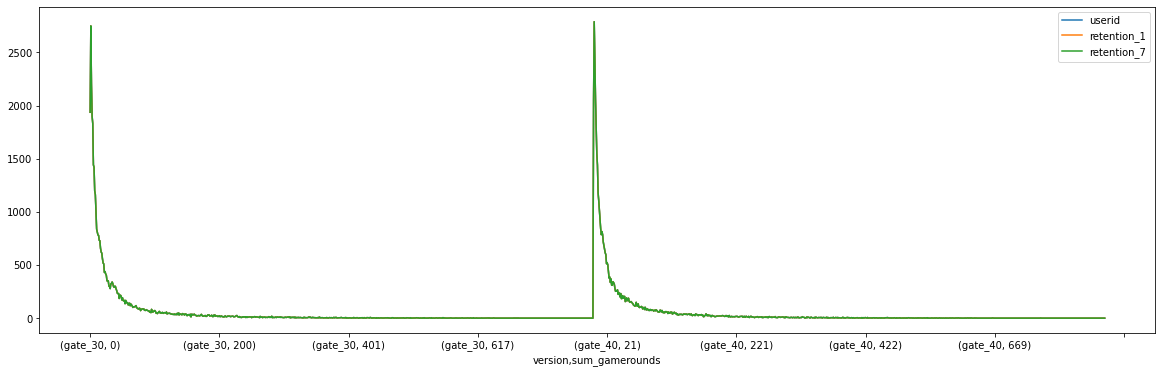

In [62]:
plot_df.plot(kind = 'line', figsize = (20, 6))

Text(0.5, 0, '# Game Rounds')

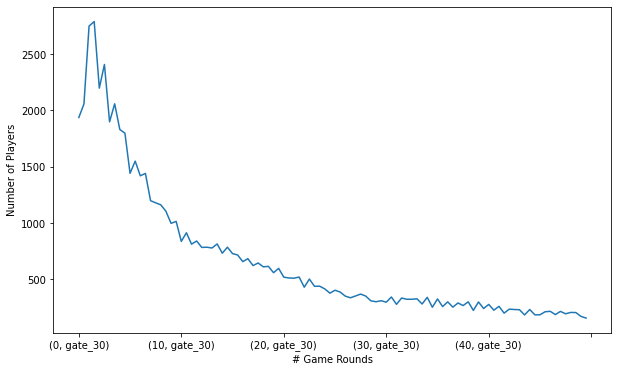

In [28]:
ax = plot_df[:100].plot(figsize = (10,6))
ax.set_title = 'The number of players that played 0-100 game rounds during the first week'
ax.set_ylabel('Number of Players')
ax.set_xlabel('# Game Rounds')

## Retention analysis

In [64]:
df.groupby('retention_1').count() 

,userid,version,sum_gamerounds,retention_7
retention_1,,,,
False,50036,50036,50036,50036
True,40153,40153,40153,40153


In [65]:
(df.groupby('retention_1').count() / df.count()) * 100

,retention_1,retention_7,sum_gamerounds,userid,version
retention_1,,,,,
False,NaN,55.47905,55.47905,55.47905,55.47905
True,NaN,44.52095,44.52095,44.52095,44.52095


### 44.5% players played the game 1 day after install

In [66]:
(df.groupby('retention_7').count() / df.count()) * 100

,retention_1,retention_7,sum_gamerounds,userid,version
retention_7,,,,,
False,81.393518,NaN,81.393518,81.393518,81.393518
True,18.606482,NaN,18.606482,18.606482,18.606482


### 18.6% of players played the game 7 days after install

In [67]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
